In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df=pd.read_csv('/Users/pushpakreddy/scifor/country_vaccinations.csv')

In [17]:
print(df.head())

       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                 

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              25862 non-null  object 
 1   iso_code                             25862 non-null  object 
 2   date                                 25862 non-null  object 
 3   total_vaccinations                   14522 non-null  float64
 4   people_vaccinated                    13762 non-null  float64
 5   people_fully_vaccinated              11041 non-null  float64
 6   daily_vaccinations_raw               12003 non-null  float64
 7   daily_vaccinations                   25595 non-null  float64
 8   total_vaccinations_per_hundred       14522 non-null  float64
 9   people_vaccinated_per_hundred        13762 non-null  float64
 10  people_fully_vaccinated_per_hundred  11041 non-null  float64
 11  daily_vaccinations_per_milli

In [20]:
print(df.describe())

       total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        1.452200e+04       1.376200e+04             1.104100e+04   
mean         9.139252e+06       4.737802e+06             2.681353e+06   
std          4.592776e+07       1.797156e+07             1.093032e+07   
min          0.000000e+00       0.000000e+00             1.000000e+00   
25%          1.005620e+05       7.876700e+04             3.719700e+04   
50%          7.007560e+05       5.149065e+05             2.834740e+05   
75%          3.241681e+06       2.139073e+06             1.192415e+06   
max          1.029223e+09       6.220000e+08             2.232990e+08   

       daily_vaccinations_raw  daily_vaccinations  \
count            1.200300e+04        2.559500e+04   
mean             2.012910e+05        1.020430e+05   
std              1.122962e+06        7.304361e+05   
min              0.000000e+00        0.000000e+00   
25%              3.967500e+03        8.400000e+02   
50%              1.98860

In [22]:
print(df.isnull().sum())

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     11340
people_vaccinated                      12100
people_fully_vaccinated                14821
daily_vaccinations_raw                 13859
daily_vaccinations                       267
total_vaccinations_per_hundred         11340
people_vaccinated_per_hundred          12100
people_fully_vaccinated_per_hundred    14821
daily_vaccinations_per_million           267
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64


In [23]:
df.dropna(inplace=True)

In [24]:
df.fillna(0,inplace=True)

In [25]:
country_vaccine = df.groupby(["country", "iso_code", "vaccines"])[
    ['total_vaccinations', 
     'total_vaccinations_per_hundred',
     'daily_vaccinations',
     'daily_vaccinations_per_million',
     'people_vaccinated',
     'people_vaccinated_per_hundred',
     'people_fully_vaccinated',
     'people_fully_vaccinated_per_hundred']
].max().reset_index()

In [26]:
country_vaccine.columns = ["Country", "iso_code", "Vaccines", "Total vaccinations", "Percent", 
                           "Daily vaccinations", "Daily vaccinations per million", "People vaccinated", 
                           "People vaccinated per hundred", "People fully vaccinated", 
                           "People fully vaccinated percent"]

print(country_vaccine.head())

               Country iso_code  \
0          Afghanistan      AFG   
1              Albania      ALB   
2              Andorra      AND   
3  Antigua and Barbuda      ATG   
4            Argentina      ARG   

                                            Vaccines  Total vaccinations  \
0    BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech            630305.0   
1  Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...            862628.0   
2                Oxford/AstraZeneca, Pfizer/BioNTech             15269.0   
3                                 Oxford/AstraZeneca             57264.0   
4   Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V          18085389.0   

   Percent  Daily vaccinations  Daily vaccinations per million  \
0     1.62              6487.0                           167.0   
1    29.98             12160.0                          4225.0   
2    19.76               573.0                          7416.0   
3    58.48              1098.0                         11212.0   
4 

In [27]:
top_vaccinated_countries = country_vaccine.sort_values(by='Total vaccinations', ascending=False).head(10)

print(top_vaccinated_countries[['Country', 'Total vaccinations']])

            Country  Total vaccinations
23            China         845299000.0
131   United States         317966408.0
55            India         274286599.0
15           Brazil          86960570.0
130  United Kingdom          74577678.0
44          Germany          66454623.0
36          England          62636714.0
40           France          48213297.0
61            Italy          46016709.0
126          Turkey          42613378.0


In [28]:
global_total_vaccinations = df['total_vaccinations'].sum()
print("Global Total Vaccinations: ", global_total_vaccinations)

Global Total Vaccinations:  89006289981.0


In [30]:
df['date']=pd.to_datetime(df['date'])

In [31]:
df.set_index('date',inplace=True)

In [32]:
monthly_vaccination = df['total_vaccinations'].resample('M').sum()

print(monthly_vaccination)

date
2020-12-31    4.023425e+06
2021-01-31    8.250616e+08
2021-02-28    3.603466e+09
2021-03-31    9.824732e+09
2021-04-30    1.846450e+10
2021-05-31    2.942998e+10
2021-06-30    2.685453e+10
Freq: ME, Name: total_vaccinations, dtype: float64


/var/folders/3p/zqqw_8597cqffx2wqp9cylyc0000gr/T/ipykernel_1416/4284013181.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_vaccination = df['total_vaccinations'].resample('M').sum()


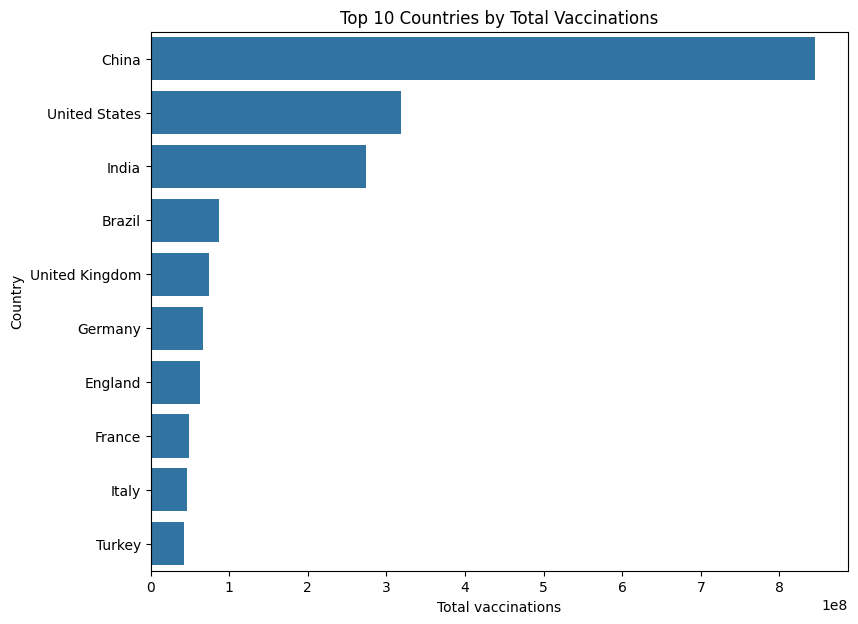

In [37]:
plt.figure(figsize=(9, 7))
sns.barplot(x='Total vaccinations', y='Country', data=top_vaccinated_countries)
plt.title("Top 10 Countries by Total Vaccinations")
plt.show()